# Plotting samples from the weight prior

Parameter w is a random variable governed b a prior probability distribution p(w).
$$ p(w) = N( w, u_0, \sigma_w^2 )$$





In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Calaulte the sample
- Formula: y = wx + b
  - w = N( w; mu_w, sigma_w<sup>2</sup>)
  - b = N( b; mu_b, sigma_b<sup>2</sup>)

In [ ]:
"""
y = wx + b
w = N(w; mu_w, sigma_w)
b = N(b; mu_b, sigma_b)
"""

# Set up the values to be plotted
grid_size = 0.01
x_grid = np.arange(-5, 5, grid_size)
D = 2  # There are two parameters
line_count = 200 # Number of data sample line

# set up helper code
def sample_prior_weights(x_grid, mu_w=0, mu_b=0, sigma_w=0.2, sigma_b=0.2):
    X = np.vstack((
        x_grid,
        np.ones(x_grid.shape[0])
    )).T

    w_0 = np.hstack([mu_w, mu_b])
    V_0 = np.diag([sigma_w, sigma_b])**2
    
    w = np.random.randn(line_count, D) @ V_0 + w_0
    
    return X @ w.T

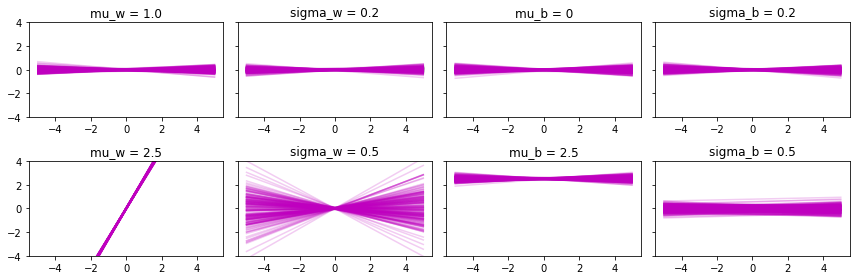

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(12, 4), sharey=True)

axs[0][0].set_ylim((-4, 4))

for i in range(4):
  if i == 0: 
    y_0 = sample_prior_weights(x_grid, mu_w=0)
    title_0 = "mu_w = 1.0"
    y_1 = sample_prior_weights(x_grid, mu_w=2.5)
    title_1 = "mu_w = 2.5"
  elif i == 1:
    y_0 = sample_prior_weights(x_grid, sigma_w = 0.2)
    y_1 = sample_prior_weights(x_grid, sigma_w = 0.5)
    title_0 = "sigma_w = 0.2"
    title_1 = "sigma_w = 0.5"
  elif i == 2:
    y_0 = sample_prior_weights(x_grid, mu_b = 0)
    y_1 = sample_prior_weights(x_grid, mu_b = 2.5)
    title_0 = "mu_b = 0"
    title_1 = "mu_b = 2.5"
  elif i == 3:
    y_0 = sample_prior_weights(x_grid, sigma_b = 0.2)
    y_1 = sample_prior_weights(x_grid, sigma_b = 0.5)
    title_0 = "sigma_b = 0.2"
    title_1 = "sigma_b = 0.5"


  axs[0][i].plot(
      x_grid, 
      y_0,
      '-m', 
      alpha=.2
  )
  axs[0][i].set_title(title_0)

  axs[1][i].plot(
      x_grid, 
      y_1,
      '-m', 
      alpha=.2
  )
  axs[1][i].set_title(title_1)

plt.tight_layout() # for layout tidy
# plt.savefig('images/' + filename, bbox_inches="tight")
plt.show()

## Outcome Analyze

- mu_w: 斜率
- sigma_w: 斜率變動
- mu_b: y截距
- sigma_b: y截距變動



